In [23]:
from sklearn.datasets import fetch_openml 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report


### DATA SET

In [24]:
#dataset
mnist = fetch_openml('mnist_784', as_frame= False)


#extraer data x  and y 
x , y = mnist.data, mnist.target
print(f'x{x}')
print(f'shape x :{np.shape(x)}')
print(f'y{y}')
print(f'shape y :{np.shape(y)}')

c:\python\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


x[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape x :(70000, 784)
y['5' '0' '4' ... '4' '5' '6']
shape y :(70000,)


### GRAFICAMOS LAS IMAGENES

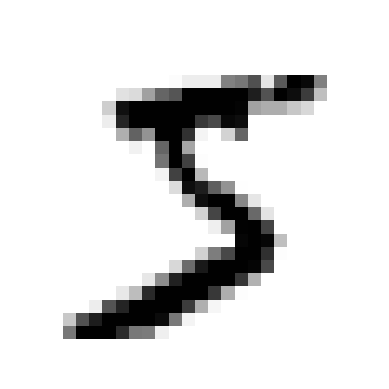

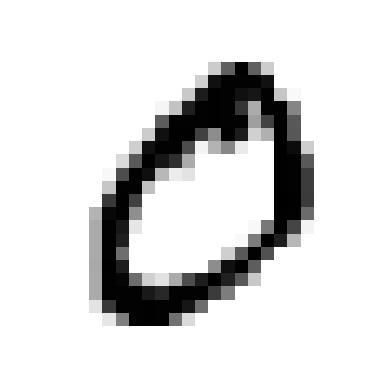

In [30]:
#cada imagen tiene 784 caracteristicas (28px x 28px)
from matplotlib.colors import ListedColormap

def plot_img_digit(image_data):
    image = image_data.reshape(28,28)
    cmap = 'binary'
    plt.imshow(image, cmap=cmap)
    plt.axis("off") # desactivamos los ejes
    

#shows img  
for i in range(2):
    digit=x[i]
    plot_img_digit(digit)
    plt.show()



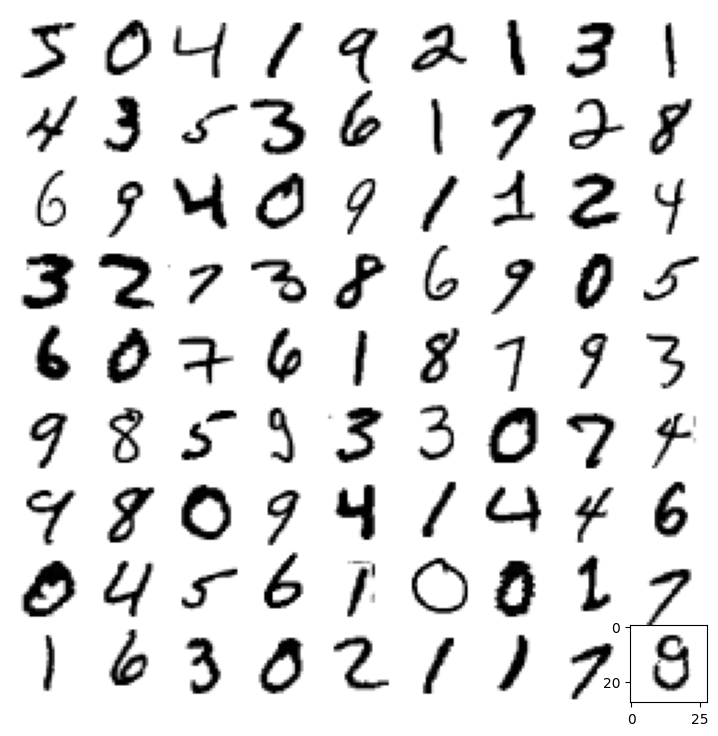

In [37]:
#shows img 
plt.figure(figsize=(9,9))
for idx , img_value in enumerate(x[:81]):
    plt.subplot(9,9,idx + 1)
    plot_img_digit(img_value)

plt.subplots_adjust(wspace=0, hspace= 0)
plt.axis('off')
plt.show()

##### SEPARACION X_TRAIN, X_TEST, Y_TRAIN ,Y_TEST

In [ ]:
#split mnist(dataset)
x_train, x_test, y_train, y_test = x[:60000] , x[60000:] , y[:60000] , y[60000:]
x_train.shape

(60000, 784)

In [ ]:
#TRAINING BINARY CLASSIFICATION

y_train_5 = y_train=='5'
y_train_5

y_test_5 = y_test == '5'
y_test_5


array([False, False, False, ..., False,  True, False])

In [ ]:
# importamos las librerias de desenco de  gradiente estocastico (SGD)
from sklearn.linear_model import SGDClassifier  # es como regresion lineal pero para clasificaion

model_SGD_Classifier = SGDClassifier()

#training 
model_SGD_Classifier.fit(x_train,y_train_5)


SGDClassifier()

In [ ]:
#testing 
predict_SGDClassif = model_SGD_Classifier.predict(x_test)


print(predict_SGDClassif)

#metrics testing
# accuracy_SGDClassif_test = accuracy_score(y_test,predict_SGDClassif)
# report_SGDClassif_test = classification_report(y_test , predict_SGDClassif)



[False False False ... False  True False]


#### MEDICION DE PRECISION MEDIANTE "CROSS VALIDATION"


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_SGD_Classifier, x_train , y_train_5 ,cv = 3 , scoring="accuracy")

array([0.93135, 0.951  , 0.90515])

#### IMPLEMENTAMOS NUESTRO PROPIO "CROSS VALIDATION"

In [44]:
from sklearn.model_selection import StratifiedKFold # donde el conjunto de datos se divide en k subconjuntos y entrenar y validar k veces
from sklearn.base import clone 


SKFolds = StratifiedKFold(n_splits = 3) #defaul shuffle = True 
                                        #n_splist = k veces 
                                        #randow static

for train_index, test_index  in SKFolds.split(x_train, y_train_5):
    clone_model_SGD_Classifier = clone(model_SGD_Classifier)
    x_train_kfols = x_train[train_index]
    y_train_5_kfols = y_train_5[test_index]

    x_test_fold = x_train_


40000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
40000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
40000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
